In [12]:
import requests
import csv
from bs4 import BeautifulSoup
import pandas as pd
import html5lib
import altair as alt
alt.renderers.enable('notebook')


RendererRegistry.enable('notebook')

In [20]:
page = requests.get('http://bscintra.buffalostate.edu/msched/201930-courses_ug.html')
soup = BeautifulSoup(page.text, 'html.parser')

klass = "deptlist"
departments = soup.find(class_=klass)
departments = departments.find_all('a')

dic = {}
for d in departments:
    href = d.get('href')
    url = 'http://bscintra.buffalostate.edu/msched/' + href
    dep_name = d.contents[0]
    dic[dep_name] = len(pd.read_html(url)[0])


In [19]:
department_s = pd.Series(dic)
department_df = pd.DataFrame(department_s, columns=['count']).reset_index()
department_df

,index,count
0,ACADEMIC AFFAIRS,14
1,AFRICAN AMERICAN STUDIES,11
2,ANTHROPOLOGY,18
3,ART & DESIGN,130
4,BIOLOGY,37
5,BUSINESS,71
6,BUTLER LIBRARY,2
7,CAREER AND TECHNICAL EDUCATION,24
8,CHEMISTRY,38
9,COACHING AND PHYSICAL EDUCATION,7


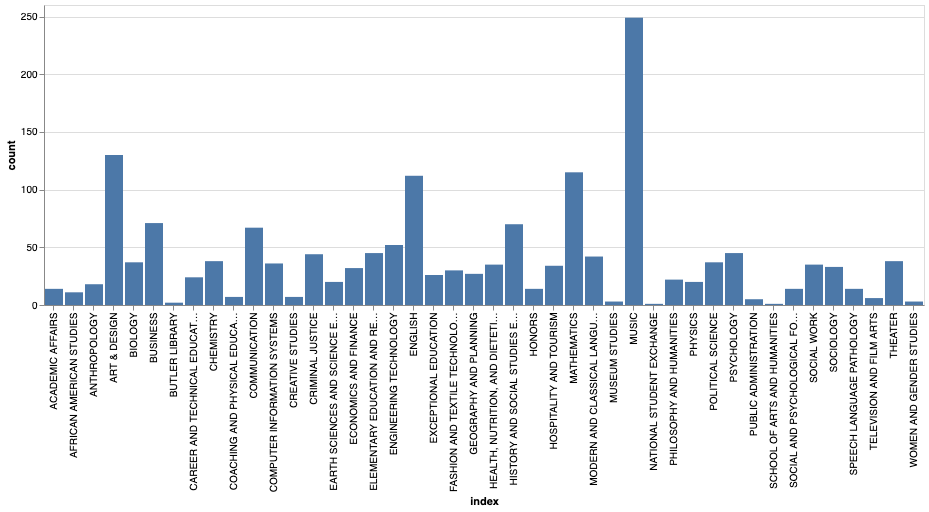

In [18]:
alt.Chart(department_df).mark_bar().encode(
    x='index',
    y='count',
    tooltip=['count']
)